#self grade: 275/300

Assembling the dataset: 60/60 points
Cleaning and organizing the dataset: 55/60 points
Exploratory analysis of the dataset: 60/60 points)
Visualizing the dataset: 55/60 points)
Synthesis and Analysis of the dataset: 55/60 points

# Missoula County Opiod Buyer Exploration (2006-2014)

In [1]:
#libraries needed for project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import numpy as np 

In [2]:
#import file
file_content1 = pd.read_csv('/Users\katrl\Desktop\Python_Assignments/arcos-mt-missoula-30063-itemized.csv')

# Introduction:
This data for opiods supplied to the Missoula County area from the years 2006 to 2014 is from the DEA pain pill database that The Washington Post used for their extensive investigative reporting. This data includes only Oxycodone and Hydrocodone and their tablet versions. Those supplied include retail pharmacies, dentists, and even veternary clinics. Currently data is only up until 2014 due to lawsuits in Ohio. The Washington Post continues to submit Freedom of Information Act requests to obtain newer data. I ended up removing a number of different columns due to them being Producer based so I could focus on the Buyer side. I also got rid of some additional columns that were null or obsolete towards that focus. This file was also extremely large so it helps speed it up to reduce the data quantity. 

# Quick Note:
Washington Post's project did top distributors, manufacturers and pharmacies already- so I was searching for a way to look at Missoula County differently. 

In [5]:
#open(file_content)

# Basic Exploration of Missoula County data 

# Data Dictionary from the WP: 
https://github.com/katrlmt/arcos-api/blob/master/data/data_dictionary.csv

In [9]:
print(file_content1.tail())

       BUYER_DEA_NO    BUYER_BUS_ACT    BUYER_NAME BUYER_ADDL_CO_INFO  \
109757    BA7360340  RETAIL PHARMACY  A AND C DRUG                NaN   
109758    BA7360340  RETAIL PHARMACY  A AND C DRUG                NaN   
109759    BA7360340  RETAIL PHARMACY  A AND C DRUG                NaN   
109760    BA7360340  RETAIL PHARMACY  A AND C DRUG                NaN   
109761    BA7360340  RETAIL PHARMACY  A AND C DRUG                NaN   

                  BUYER_ADDRESS1 BUYER_ADDRESS2 BUYER_CITY  BUYER_ZIP  \
109757  523 NORTH HIGGINS AVENUE            NaN   MISSOULA      59802   
109758  523 NORTH HIGGINS AVENUE            NaN   MISSOULA      59802   
109759  523 NORTH HIGGINS AVENUE            NaN   MISSOULA      59802   
109760  523 NORTH HIGGINS AVENUE            NaN   MISSOULA      59802   
109761  523 NORTH HIGGINS AVENUE            NaN   MISSOULA      59802   

       BUYER_COUNTY  DRUG_CODE  ...  DOSAGE_UNIT TRANSACTION_ID  \
109757     MISSOULA       9193  ...        100.0       

In [10]:
file_content1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109762 entries, 0 to 109761
Data columns (total 28 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   BUYER_DEA_NO           109762 non-null  object 
 1   BUYER_BUS_ACT          109762 non-null  object 
 2   BUYER_NAME             109762 non-null  object 
 3   BUYER_ADDL_CO_INFO     38586 non-null   object 
 4   BUYER_ADDRESS1         109762 non-null  object 
 5   BUYER_ADDRESS2         30953 non-null   object 
 6   BUYER_CITY             109762 non-null  object 
 7   BUYER_ZIP              109762 non-null  int64  
 8   BUYER_COUNTY           109762 non-null  object 
 9   DRUG_CODE              109762 non-null  int64  
 10  NDC_NO                 109762 non-null  int64  
 11  DRUG_NAME              109762 non-null  object 
 12  QUANTITY               109762 non-null  int64  
 13  ORDER_FORM_NO          45197 non-null   object 
 14  CORRECTION_NO          31 non-null  

In [11]:
file_content1.describe()

,BUYER_ZIP,DRUG_CODE,NDC_NO,QUANTITY,CORRECTION_NO,STRENGTH,TRANSACTION_DATE,CALC_BASE_WT_IN_GM,DOSAGE_UNIT,TRANSACTION_ID,MME_Conversion_Factor,Reporter_family,dos_str
count,109762.000000,109762.000000,1.097620e+05,109762.000000,3.100000e+01,21911.000000,1.097620e+05,109762.000000,109761.000000,1.097620e+05,109762.000000,109635.000000,109762.000000
mean,59806.512208,9172.857328,1.311358e+10,2.049862,3.170627e+06,263.155493,6.712316e+06,2.365680,346.787885,7.811975e+08,1.201427,11.459120,2965.785904
std,12.377016,24.523700,2.364012e+10,1.983597,8.316766e+06,440.356139,3.432358e+06,2.631589,335.460292,4.827252e+08,0.245237,11.767167,3721.761986
min,59801.000000,9143.000000,5.405512e+07,1.000000,7.560000e+03,0.000000,1.012006e+06,0.090810,20.000000,1.000000e+00,1.000000,2.500000,90.810000
25%,59801.000000,9143.000000,4.060365e+08,1.000000,2.387750e+04,0.000000,4.032008e+06,0.896500,100.000000,6.030278e+08,1.000000,5.000000,908.100000
50%,59802.000000,9193.000000,5.910349e+08,1.000000,2.390600e+04,0.000000,7.032013e+06,1.793000,200.000000,9.050089e+08,1.000000,7.500000,2017.125000
75%,59808.000000,9193.000000,6.034990e+08,2.000000,2.392950e+04,1000.000000,1.001201e+07,3.027000,500.000000,1.203002e+09,1.500000,10.000000,3361.875000
max,59868.000000,9193.000000,6.877402e+10,71.000000,2.490333e+07,1000.000000,1.231201e+07,71.720000,7500.000000,1.412327e+09,1.500000,80.000000,107580.000000


# Breaking down the drug quantity by city/town in Missoula County

In [12]:
cols = ['BUYER_CITY', 'BUYER_ZIP', 'BUYER_NAME', 'DRUG_NAME', 'QUANTITY', 'DOSAGE_UNIT']

city_drug = pd.DataFrame(file_content1.loc[:, cols])

In [13]:
city_drug

,BUYER_CITY,BUYER_ZIP,BUYER_NAME,DRUG_NAME,QUANTITY,DOSAGE_UNIT
0,MISSOULA,59802,THE BROADWAY PHARMACY,HYDROCODONE,1,500.0
1,LOLO,59847,LOLO DRUG,OXYCODONE,1,100.0
2,LOLO,59847,LOLO DRUG,OXYCODONE,1,100.0
3,LOLO,59847,LOLO DRUG,OXYCODONE,1,100.0
4,LOLO,59847,LOLO DRUG,HYDROCODONE,1,500.0
...,...,...,...,...,...,...
109757,MISSOULA,59802,A AND C DRUG,HYDROCODONE,1,100.0
109758,MISSOULA,59802,A AND C DRUG,OXYCODONE,4,400.0
109759,MISSOULA,59802,A AND C DRUG,HYDROCODONE,2,200.0
109760,MISSOULA,59802,A AND C DRUG,HYDROCODONE,1,500.0


In [37]:
## Create some variables to work with
city = city_drug['BUYER_CITY']
drug_name2 = city_drug['DRUG_NAME']
buyer_name2 = city_drug['BUYER_NAME']
dosage = city_drug['DOSAGE_UNIT']
quantity = city_drug['QUANTITY']
zip = city_drug['BUYER_ZIP']

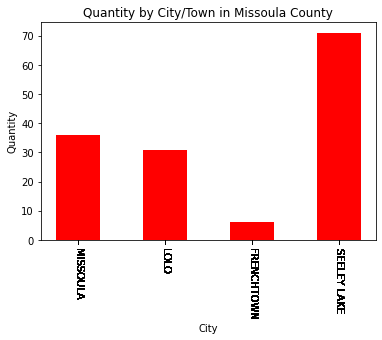

In [38]:
xvals = title
  
# heights
height = quantity
  
# labels
ticks = city
  
# bar chart
plt.bar(xvals, height, tick_label = ticks,
        width = 0.5, color = 'red') ## test adding in different colors
  
# x-axis
plt.xlabel('City')
# y-axis
plt.ylabel('Quantity')
# title
plt.title('Quantity by City/Town in Missoula County')

plt.xticks(rotation = -90); # Rotates X-Axis Ticks by 45-degrees

Max quantities of all the towns/cities in Missoula County compared to each other. We can see Seeley Lake has the highest amount ordered in one order which is an interesting observation despite it happening only a single time. 

[[ 1.         -0.04881848]
 [-0.04881848  1.        ]]


<function matplotlib.pyplot.show(close=None, block=None)>

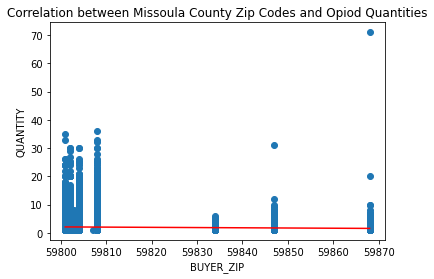

In [39]:
x = city_drug['BUYER_ZIP']
y = city_drug['QUANTITY']

print(np.corrcoef(x, y))

plt.scatter(x, y) 
plt.title('Correlation between Missoula County Zip Codes and Opiod Quantities')
plt.xlabel('BUYER_ZIP')
plt.ylabel('QUANTITY')
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), color='red')
plt.show

Correlation between Zip and Quantity shows that Missoula had the highest quantity of pills ordered. That being said our outlier of 71 pills dispensed at one time shows prominently on the plot. 10 pills shows as the most common quantity across the entire county. 

# Data broken down by individual city/town

# Missoula

In [52]:
Missoula = (file_content1.loc[((file_content1['BUYER_CITY'] == 'MISSOULA'))]) 

In [69]:
Missoula

,BUYER_DEA_NO,BUYER_BUS_ACT,BUYER_NAME,BUYER_ADDL_CO_INFO,BUYER_ADDRESS1,BUYER_ADDRESS2,BUYER_CITY,BUYER_ZIP,BUYER_COUNTY,DRUG_CODE,...,DOSAGE_UNIT,TRANSACTION_ID,Product_Name,Ingredient_Name,Measure,MME_Conversion_Factor,Combined_Labeler_Name,Revised_Company_Name,Reporter_family,dos_str
0,BT8022193,RETAIL PHARMACY,THE BROADWAY PHARMACY,CARON CORPORATION,500 W BROADWAY,NaN,MISSOULA,59802,MISSOULA,9193,...,500.0,5707,HYDROCODONE BIT. 10MG/ACETAMINOPHEN,HYDROCODONE BITARTRATE HEMIPENTAHYDRATE,TAB,1.0,"Actavis Pharma, Inc.",Bellco Drug Corp,10.0,3027.0
51,AP2224323,RETAIL PHARMACY,PALMER'S DRUG,NaN,918 S.W. HIGGINS,NaN,MISSOULA,59803,MISSOULA,9193,...,500.0,608003938,HYDROCODONE BIT/ACETAMINOPHEN 5MG/50,HYDROCODONE BITARTRATE HEMIPENTAHYDRATE,TAB,1.0,SpecGx LLC,McKesson Corporation,5.0,1513.5
52,AP2224323,RETAIL PHARMACY,PALMER'S DRUG,NaN,918 S.W. HIGGINS,NaN,MISSOULA,59803,MISSOULA,9193,...,500.0,610012997,HYDROCODONE BIT 5MG/ACETAMINOPHEN 50,HYDROCODONE BITARTRATE HEMIPENTAHYDRATE,TAB,1.0,"Actavis Pharma, Inc.",McKesson Corporation,5.0,1513.5
53,AP2224323,RETAIL PHARMACY,PALMER'S DRUG,NaN,918 S.W. HIGGINS,NaN,MISSOULA,59803,MISSOULA,9143,...,200.0,701030911,ENDOCET - 10MG OXYCODONE.HCL/325MG A,OXYCODONE HYDROCHLORIDE,TAB,1.5,Par Pharmaceutical,McKesson Corporation,10.0,2689.5
54,AP2224323,RETAIL PHARMACY,PALMER'S DRUG,NaN,918 S.W. HIGGINS,NaN,MISSOULA,59803,MISSOULA,9193,...,100.0,704000903,VICODIN TABLETS 5MG HYDROCODONE.BIT,HYDROCODONE BITARTRATE HEMIPENTAHYDRATE,TAB,1.0,AbbVie Inc.,McKesson Corporation,5.0,302.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109757,BA7360340,RETAIL PHARMACY,A AND C DRUG,NaN,523 NORTH HIGGINS AVENUE,NaN,MISSOULA,59802,MISSOULA,9193,...,100.0,1471,HYDROCODONE BIT./ACETAMINOPHEN TABS.,HYDROCODONE BITARTRATE HEMIPENTAHYDRATE,TAB,1.0,Amneal Pharmaceuticals LLC,Dakota Drug,5.0,302.7
109758,BA7360340,RETAIL PHARMACY,A AND C DRUG,NaN,523 NORTH HIGGINS AVENUE,NaN,MISSOULA,59802,MISSOULA,9143,...,400.0,1616,OXYCODONE HYDROCHLORIDE TABLETS 5MG,OXYCODONE HYDROCHLORIDE,TAB,1.5,SpecGx LLC,Dakota Drug,5.0,2689.5
109759,BA7360340,RETAIL PHARMACY,A AND C DRUG,NaN,523 NORTH HIGGINS AVENUE,NaN,MISSOULA,59802,MISSOULA,9193,...,200.0,1505,HYDROCODONE/IBUPROFEN 7.5MG/200MG TA,HYDROCODONE BITARTRATE HEMIPENTAHYDRATE,TAB,1.0,Amneal Pharmaceuticals LLC,Dakota Drug,7.5,908.1
109760,BA7360340,RETAIL PHARMACY,A AND C DRUG,NaN,523 NORTH HIGGINS AVENUE,NaN,MISSOULA,59802,MISSOULA,9193,...,500.0,1443,HYDROCODONE BIT 5MG/ACETAMINOPHEN 50,HYDROCODONE BITARTRATE HEMIPENTAHYDRATE,TAB,1.0,"Actavis Pharma, Inc.",Dakota Drug,5.0,1513.5


# Seeley Lake

In [50]:
Seeley_Lake = file_content1.loc[(file_content1['BUYER_CITY'] == 'SEELEY LAKE')]

In [51]:
Seeley_Lake

,BUYER_DEA_NO,BUYER_BUS_ACT,BUYER_NAME,BUYER_ADDL_CO_INFO,BUYER_ADDRESS1,BUYER_ADDRESS2,BUYER_CITY,BUYER_ZIP,BUYER_COUNTY,DRUG_CODE,...,DOSAGE_UNIT,TRANSACTION_ID,Product_Name,Ingredient_Name,Measure,MME_Conversion_Factor,Combined_Labeler_Name,Revised_Company_Name,Reporter_family,dos_str
947,FS0787739,RETAIL PHARMACY,SEELEY SWAN PHARMACY,ATTN: KAREN DOVE,PO BOX 930,"3027 HWY 83, LAZY PINES MALL #J",SEELEY LAKE,59868,MISSOULA,9193,...,100.0,807005148,HYDROCODO.BIT 10MG&AC USP TAB,HYDROCODONE BITARTRATE HEMIPENTAHYDRATE,TAB,1.0,SpecGx LLC,McKesson Corporation,10.0,605.400
948,FS0787739,RETAIL PHARMACY,SEELEY SWAN PHARMACY,ATTN: KAREN DOVE,PO BOX 930,"3027 HWY 83, LAZY PINES MALL #J",SEELEY LAKE,59868,MISSOULA,9193,...,500.0,901005406,HYDROCODONE BIT/ACETA 10MG/500MG USP,HYDROCODONE BITARTRATE HEMIPENTAHYDRATE,TAB,1.0,SpecGx LLC,McKesson Corporation,10.0,3027.000
949,FS0787739,RETAIL PHARMACY,SEELEY SWAN PHARMACY,ATTN: KAREN DOVE,PO BOX 930,"3027 HWY 83, LAZY PINES MALL #J",SEELEY LAKE,59868,MISSOULA,9193,...,100.0,907005731,HYDROCODONE BIT/ACETA 5MG/325MG USP,HYDROCODONE BITARTRATE HEMIPENTAHYDRATE,TAB,1.0,SpecGx LLC,McKesson Corporation,5.0,302.700
950,FS0787739,RETAIL PHARMACY,SEELEY SWAN PHARMACY,ATTN: KAREN DOVE,PO BOX 930,"3027 HWY 83, LAZY PINES MALL #J",SEELEY LAKE,59868,MISSOULA,9193,...,500.0,907016475,HYDROCODONE BIT.7.5MG/ACETAMINOPHEN,HYDROCODONE BITARTRATE HEMIPENTAHYDRATE,TAB,1.0,"Actavis Pharma, Inc.",McKesson Corporation,7.5,2270.250
951,FS0787739,RETAIL PHARMACY,SEELEY SWAN PHARMACY,ATTN: KAREN DOVE,PO BOX 930,"3027 HWY 83, LAZY PINES MALL #J",SEELEY LAKE,59868,MISSOULA,9143,...,100.0,911023555,OXYCONTIN (OXYCODONE.HCL) CONTROLLED,OXYCODONE HYDROCHLORIDE,TAB,1.5,Purdue Pharma LP,McKesson Corporation,20.0,2689.500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109568,BH9362675,RETAIL PHARMACY,HEALTHCARE PLUS,NaN,3194 HIGHWAY 83,PO BOX 748,SEELEY LAKE,59868,MISSOULA,9193,...,500.0,8206,HYDROCODONE BIT 5MG/ACETAMINOPHEN 50,HYDROCODONE BITARTRATE HEMIPENTAHYDRATE,TAB,1.0,"Actavis Pharma, Inc.",AmerisourceBergen Drug,5.0,1513.500
109569,BH9362675,RETAIL PHARMACY,HEALTHCARE PLUS,NaN,3194 HIGHWAY 83,PO BOX 748,SEELEY LAKE,59868,MISSOULA,9143,...,100.0,9480,OXYCONTIN - 80MG OXYCODONE.HCL CONTR,OXYCODONE HYDROCHLORIDE,TAB,1.5,Purdue Pharma LP,AmerisourceBergen Drug,80.0,10758.000
109570,BH9362675,RETAIL PHARMACY,HEALTHCARE PLUS,NaN,3194 HIGHWAY 83,PO BOX 748,SEELEY LAKE,59868,MISSOULA,9143,...,100.0,13229,OXYCODONE HYDROCHLORIDE - ER - 80MG/,OXYCODONE HYDROCHLORIDE,TAB,1.5,"Teva Pharmaceuticals USA, Inc.",AmerisourceBergen Drug,80.0,10758.000
109571,BH9362675,RETAIL PHARMACY,HEALTHCARE PLUS,NaN,3194 HIGHWAY 83,PO BOX 748,SEELEY LAKE,59868,MISSOULA,9193,...,200.0,17747,HYDROCODONE.BITARTRATE/IBUPROFEN 7.5,HYDROCODONE BITARTRATE HEMIPENTAHYDRATE,TAB,1.0,"Actavis Pharma, Inc.",AmerisourceBergen Drug,7.5,908.100


# Lolo

In [55]:
Lolo = file_content1.loc[(file_content1['BUYER_CITY'] == 'LOLO')]

In [70]:
Lolo

,BUYER_DEA_NO,BUYER_BUS_ACT,BUYER_NAME,BUYER_ADDL_CO_INFO,BUYER_ADDRESS1,BUYER_ADDRESS2,BUYER_CITY,BUYER_ZIP,BUYER_COUNTY,DRUG_CODE,...,DOSAGE_UNIT,TRANSACTION_ID,Product_Name,Ingredient_Name,Measure,MME_Conversion_Factor,Combined_Labeler_Name,Revised_Company_Name,Reporter_family,dos_str
1,AL6110427,RETAIL PHARMACY,LOLO DRUG,NaN,103 GLACIER DRIVE LOLO MT,NaN,LOLO,59847,MISSOULA,9143,...,100.0,602022098,OXYCONTIN - 10MG OXYCODONE.HCL CONTR,OXYCODONE HYDROCHLORIDE,TAB,1.5,Purdue Pharma LP,McKesson Corporation,10.00,1344.750
2,AL6110427,RETAIL PHARMACY,LOLO DRUG,NaN,103 GLACIER DRIVE LOLO MT,NaN,LOLO,59847,MISSOULA,9143,...,100.0,604018010,OXYCODO.HCL 5.35MG/TAB,OXYCODONE HYDROCHLORIDE,TAB,1.5,"Actavis Pharma, Inc.",McKesson Corporation,5.35,719.361
3,AL6110427,RETAIL PHARMACY,LOLO DRUG,NaN,103 GLACIER DRIVE LOLO MT,NaN,LOLO,59847,MISSOULA,9143,...,100.0,605026238,OXYCOD.HCL ER TABS;10MG/TAB,OXYCODONE HYDROCHLORIDE,TAB,1.5,Par Pharmaceutical,McKesson Corporation,10.00,1344.750
4,AL6110427,RETAIL PHARMACY,LOLO DRUG,NaN,103 GLACIER DRIVE LOLO MT,NaN,LOLO,59847,MISSOULA,9193,...,500.0,606012784,HYDROCODONE BIT.7.5MG/ACETAMINOPHEN,HYDROCODONE BITARTRATE HEMIPENTAHYDRATE,TAB,1.0,"Actavis Pharma, Inc.",McKesson Corporation,7.50,2270.250
5,AL6110427,RETAIL PHARMACY,LOLO DRUG,NaN,103 GLACIER DRIVE LOLO MT,NaN,LOLO,59847,MISSOULA,9193,...,500.0,612012685,HYDROCODONE BIT 5MG/ACETAMINOPHEN 50,HYDROCODONE BITARTRATE HEMIPENTAHYDRATE,TAB,1.0,"Actavis Pharma, Inc.",McKesson Corporation,5.00,1513.500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108946,FL3149449,RETAIL PHARMACY,LOLO DRUG LLC,"ATTN: CHAD A. SMITH, RPH, PHARMACIST IN CHARGE",103 GLACIER DRIVE,NaN,LOLO,59847,MISSOULA,9143,...,500.0,1402015527,OXYCODONE HYDROCHLORIDE TABLETS 5MG,OXYCODONE HYDROCHLORIDE,TAB,1.5,SpecGx LLC,McKesson Corporation,5.00,3361.875
108947,FL3149449,RETAIL PHARMACY,LOLO DRUG LLC,"ATTN: CHAD A. SMITH, RPH, PHARMACIST IN CHARGE",103 GLACIER DRIVE,NaN,LOLO,59847,MISSOULA,9143,...,200.0,1402043990,OXYCODONE HCL 20MG IR TABLET,OXYCODONE HYDROCHLORIDE,TAB,1.5,Zydus Pharmaceuticals (USA) Inc.,McKesson Corporation,20.00,5379.000
108948,FL3149449,RETAIL PHARMACY,LOLO DRUG LLC,"ATTN: CHAD A. SMITH, RPH, PHARMACIST IN CHARGE",103 GLACIER DRIVE,NaN,LOLO,59847,MISSOULA,9193,...,500.0,1405012799,HYDROCODONE BIT/ACETA 7.5MG/325MG US,HYDROCODONE BITARTRATE HEMIPENTAHYDRATE,TAB,1.0,SpecGx LLC,McKesson Corporation,7.50,2270.250
108949,FL3149449,RETAIL PHARMACY,LOLO DRUG LLC,"ATTN: CHAD A. SMITH, RPH, PHARMACIST IN CHARGE",103 GLACIER DRIVE,NaN,LOLO,59847,MISSOULA,9143,...,200.0,1412006202,"OXYCODONE HCL 15MG TABLETS, 100 CT",OXYCODONE HYDROCHLORIDE,TAB,1.5,"Actavis Pharma, Inc.",McKesson Corporation,15.00,4034.250


# Frenchtown

In [57]:
Frenchtown = file_content1.loc[(file_content1['BUYER_CITY'] == 'FRENCHTOWN')]

In [58]:
Frenchtown

,BUYER_DEA_NO,BUYER_BUS_ACT,BUYER_NAME,BUYER_ADDL_CO_INFO,BUYER_ADDRESS1,BUYER_ADDRESS2,BUYER_CITY,BUYER_ZIP,BUYER_COUNTY,DRUG_CODE,...,DOSAGE_UNIT,TRANSACTION_ID,Product_Name,Ingredient_Name,Measure,MME_Conversion_Factor,Combined_Labeler_Name,Revised_Company_Name,Reporter_family,dos_str
861,FG0617158,RETAIL PHARMACY,"G & E VENTURES, INC.",DBA GRANITE PHARMACY FRENCHTOWN,16862 BECKWITH STREET,SUITE P,FRENCHTOWN,59834,MISSOULA,9143,...,100.0,808027679,ENDOCET - 7.5MG OXYCODONE.HCL/325MG,OXYCODONE HYDROCHLORIDE,TAB,1.5,Par Pharmaceutical,McKesson Corporation,7.5,1008.5625
862,FG0617158,RETAIL PHARMACY,"G & E VENTURES, INC.",DBA GRANITE PHARMACY FRENCHTOWN,16862 BECKWITH STREET,SUITE P,FRENCHTOWN,59834,MISSOULA,9193,...,200.0,901016359,HYDROCODONE BIT. 10MG/ACETAMINOPHEN,HYDROCODONE BITARTRATE HEMIPENTAHYDRATE,TAB,1.0,"Actavis Pharma, Inc.",McKesson Corporation,10.0,1210.8000
863,FG0617158,RETAIL PHARMACY,"G & E VENTURES, INC.",DBA GRANITE PHARMACY FRENCHTOWN,16862 BECKWITH STREET,SUITE P,FRENCHTOWN,59834,MISSOULA,9143,...,100.0,902024662,OXYCONTIN (OXYCODONE.HCL) CONTROLLED,OXYCODONE HYDROCHLORIDE,TAB,1.5,Purdue Pharma LP,McKesson Corporation,20.0,2689.5000
864,FG0617158,RETAIL PHARMACY,"G & E VENTURES, INC.",DBA GRANITE PHARMACY FRENCHTOWN,16862 BECKWITH STREET,SUITE P,FRENCHTOWN,59834,MISSOULA,9143,...,100.0,906008378,OXYCODONE HYDROCHLORIDE TABLETS 5MG,OXYCODONE HYDROCHLORIDE,TAB,1.5,SpecGx LLC,McKesson Corporation,5.0,672.3750
865,FG0617158,RETAIL PHARMACY,"G & E VENTURES, INC.",DBA GRANITE PHARMACY FRENCHTOWN,16862 BECKWITH STREET,SUITE P,FRENCHTOWN,59834,MISSOULA,9143,...,100.0,906029053,ENDOCET - 10MG OXYCODONE.HCL/325MG A,OXYCODONE HYDROCHLORIDE,TAB,1.5,Par Pharmaceutical,McKesson Corporation,10.0,1344.7500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108921,FG0617158,RETAIL PHARMACY,"G & E VENTURES, INC.",DBA GRANITE PHARMACY FRENCHTOWN,16862 BECKWITH STREET,SUITE P,FRENCHTOWN,59834,MISSOULA,9193,...,500.0,1301020523,HYDROCODONE BIT 5MG/ACETAMINOPHEN 50,HYDROCODONE BITARTRATE HEMIPENTAHYDRATE,TAB,1.0,"Actavis Pharma, Inc.",McKesson Corporation,5.0,1513.5000
108922,FG0617158,RETAIL PHARMACY,"G & E VENTURES, INC.",DBA GRANITE PHARMACY FRENCHTOWN,16862 BECKWITH STREET,SUITE P,FRENCHTOWN,59834,MISSOULA,9193,...,500.0,1302009419,HYDROCODONE BIT/ACETA 10MG/325MG USP,HYDROCODONE BITARTRATE HEMIPENTAHYDRATE,TAB,1.0,SpecGx LLC,McKesson Corporation,10.0,3027.0000
108923,FG0617158,RETAIL PHARMACY,"G & E VENTURES, INC.",DBA GRANITE PHARMACY FRENCHTOWN,16862 BECKWITH STREET,SUITE P,FRENCHTOWN,59834,MISSOULA,9193,...,100.0,1304009978,HYDROCODONE BIT/ACETA 5MG/325MG USP,HYDROCODONE BITARTRATE HEMIPENTAHYDRATE,TAB,1.0,SpecGx LLC,McKesson Corporation,5.0,302.7000
108924,FG0617158,RETAIL PHARMACY,"G & E VENTURES, INC.",DBA GRANITE PHARMACY FRENCHTOWN,16862 BECKWITH STREET,SUITE P,FRENCHTOWN,59834,MISSOULA,9143,...,100.0,1404047930,OXYCODONE HCL 10MG IR TABLET,OXYCODONE HYDROCHLORIDE,TAB,1.5,Zydus Pharmaceuticals (USA) Inc.,McKesson Corporation,10.0,1344.7500


# Count of Quantity Distributed per Order

In [ ]:
Quantity_Counts = file_content1["QUANTITY"].value_counts()

In [66]:
Quantity_Counts

1     63427
2     22182
3      9535
4      5171
5      3074
6      2424
7       921
8       902
10      871
9       418
12      209
11      194
13      107
15       74
14       62
16       49
20       43
17       22
18       18
25       10
19        9
24        8
30        6
22        5
21        4
26        4
23        3
33        2
35        1
32        1
31        1
27        1
29        1
28        1
71        1
36        1
Name: QUANTITY, dtype: int64

<AxesSubplot:>

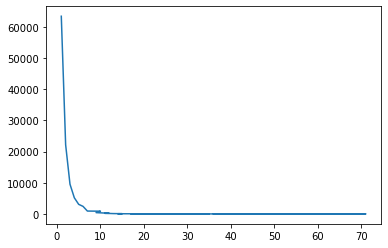

In [67]:
Quantity_Counts.plot()

Count of Quantity Distributed per Order in the above plot shows most orders of opiods in Missoula County tended to be under 10 pills during the period of 2006-2014.

In [63]:
#Details on the MAX Count
file_content1.loc[file_content1['QUANTITY'].idxmax()]

BUYER_DEA_NO                                        FS0787739
BUYER_BUS_ACT                                 RETAIL PHARMACY
BUYER_NAME                               SEELEY SWAN PHARMACY
BUYER_ADDL_CO_INFO                           ATTN: KAREN DOVE
BUYER_ADDRESS1                                     PO BOX 930
BUYER_ADDRESS2                3027 HWY 83, LAZY PINES MALL #J
BUYER_CITY                                        SEELEY LAKE
BUYER_ZIP                                               59868
BUYER_COUNTY                                         MISSOULA
DRUG_CODE                                                9143
NDC_NO                                            59011010010
DRUG_NAME                                           OXYCODONE
QUANTITY                                                   71
ORDER_FORM_NO                                       09X000097
CORRECTION_NO                                             NaN
STRENGTH                                                  NaN
TRANSACT

The outlier in Seeley Lake of 71 pills turns out to be Oxycodone and was sent to Seeley Swan Pharmacy in November of 2009.

While the Washington Post Investigation provided a general view of the state of Montana and Missoula County in general, I was able to drill down more specifically to the city and town level in Missoula County. Missoula shows the greatest number of orders for opiods which makes sense given the population size. Seeley Lake has an interest order quantity in 2009 as previously explored in the Max code. 

In [ ]:
Further Investigation Ideas

For the sake of time, I focused purely on Missoula County. However, I think comparing this opiod data to a Meth dataset would be interesting since both have affected the state over the last several decades. I would like to look at comparing that data in counties like Flathead and Cascade since both have been bigger Meth hubs than a county like Missoula.

# Source: 
https://www.washingtonpost.com/graphics/2019/investigations/dea-pain-pill-database/?itid=lk_inline_manual_18